In [56]:
# Importing the necessary libraries
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch import nn

from tqdm.auto import tqdm


### Loading the Training and Testing Data

In [57]:
# Loading the train data
train_data = datasets.MNIST(train=True,
                            transform=ToTensor(),
                            root="data",
                            download=True,
                            target_transform=None)

test_data = datasets.MNIST(train=False,
                           target_transform=None,
                           transform=ToTensor(),
                           root="data",
                           download=True)

In [58]:
# Checking the lengths of training and testing data
len(train_data), len(test_data)

(60000, 10000)

In [59]:
# Seeing a random training example
import random
from random import seed

seed(42)
rand_index = random.randint(1, len(train_data))

image, label = train_data[rand_index]
rand_index, image, label

(41906,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 

In [60]:
# Printing out the various classes present inside the MNIST dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [61]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

(-0.5, 27.5, 27.5, -0.5)

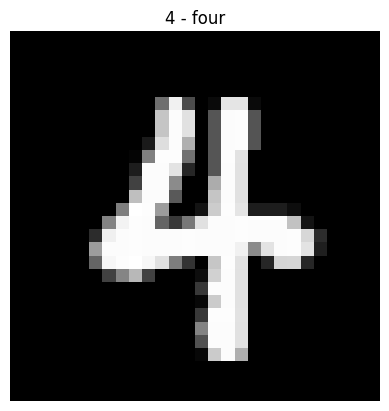

In [62]:
# Visualizing a few random images

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [63]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

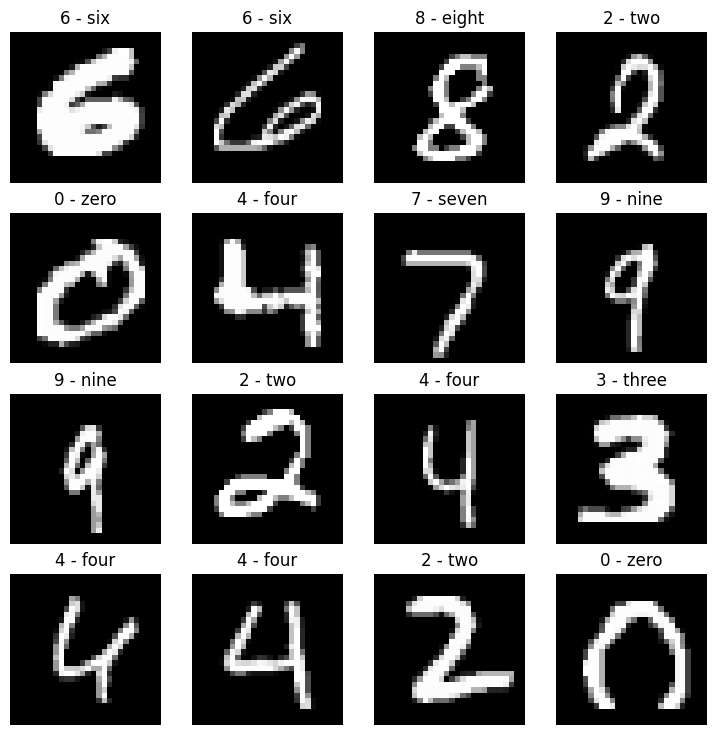

In [64]:
# Plot more random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [65]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [66]:
# Turning the train and test data into dataloaders
SEED = 42
torch.manual_seed(SEED)
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f8f4c0bf6d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8f4ceea650>)

In [67]:
# Let's check the number of batches in each of the dataloaders
print(f"Length of train dataloader: {len(train_dataloader)} of {BATCH_SIZE} batches...")
print(f"Length of test dataloader: {len(test_dataloader)} of {BATCH_SIZE} batches...")

Length of train dataloader: 1875 of 32 batches...
Length of test dataloader: 313 of 32 batches...


In [68]:
train_features_batch,  train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label Size: torch.Size([])


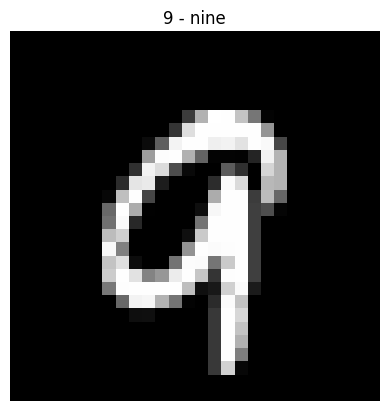

In [69]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image Size: {img.shape}")
print(f"Label Size: {label.shape}")

### Making a Simple CNN (TinyVGG) to fit our MNIST dataset

In [70]:
class MNISTModel(nn.Module):
    """
    Model Architecture of the TinyVGG model as replicated from CNN Explainer website.

    Contains: 2 Conv Blocks with two Conv2d layers and two ReLU layers and one MaxPool2d, 
    """
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()

        # Defining the first Conv Block
        self.conv_block_1= nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) 
        )

        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) 
        )

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape after passing from conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape after passing from conv block 2:{x.shape}")
        x = self.classifier(x)
        # print(f"Output shape after passing from classifier: {x.shape}")
        return x

In [71]:
model_1 = MNISTModel(input_shape=1,
                     hidden_units=10,
                     output_shape=10)
model_1.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2767, -0.0781,  0.3062],
                        [-0.0730,  0.0673, -0.1623],
                        [ 0.1958,  0.2938, -0.2445]]],
              
              
                      [[[ 0.2897,  0.0624,  0.2463],
                        [ 0.0451,  0.1607, -0.0471],
                        [ 0.2570,  0.0493, -0.1556]]],
              
              
                      [[[ 0.0850, -0.1536, -0.0391],
                        [-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004]]],
              
              
                      [[[ 0.0315, -0.3292,  0.3010],
                        [-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520]]],
              
              
                      [[[ 0.2693,  0.0364, -0.1051],
                        [ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457]]],
              
              
      

In [72]:
next(model_1.parameters()).device

device(type='cpu')

In [73]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [74]:
model_1.to(device)

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [75]:
next(model_1.parameters()).device

device(type='cpu')

In [76]:
random_image = torch.randn(size=(1, 28, 28))
random_image

tensor([[[ 1.6144e+00, -4.6171e-01, -5.7414e-01,  5.1842e-01, -4.8354e-01,
           1.3702e+00,  1.8823e-01, -1.2954e+00,  8.7616e-02,  1.1489e+00,
           8.7162e-01,  2.0577e-01, -1.0062e+00,  1.1125e+00, -7.4517e-01,
          -9.7099e-01,  7.5288e-01, -6.6769e-01,  5.5451e-01,  9.0538e-01,
           1.7207e+00,  3.2258e-01,  5.4998e-01, -6.4219e-01,  9.1989e-01,
           2.9305e-01,  7.0214e-01, -1.0596e+00],
         [-2.2214e+00,  7.0677e-01, -2.1389e-01, -4.8953e-01, -5.2316e-01,
           1.4774e+00,  3.0483e-01, -6.4894e-01,  4.9036e-01, -2.8043e-01,
           9.4100e-01, -1.1338e-01, -3.5752e-01,  1.0479e-01,  4.1266e-02,
           3.3505e-01, -2.4310e-01, -6.5055e-01, -3.3003e-01,  1.3749e+00,
          -1.3658e+00,  3.5626e-02, -4.3072e-01, -9.8891e-01, -1.0607e+00,
           7.0623e-01, -2.2878e-01, -3.0369e-02],
         [ 4.1778e-01,  3.6404e-01, -1.6342e+00,  5.9972e-01, -3.3900e-01,
           1.5490e-01, -2.7944e-01,  8.7087e-01,  2.4182e-02,  8.2635e-01,


In [77]:
model_1(random_image.unsqueeze(0))

tensor([[-0.0163, -0.0158,  0.0195, -0.0881,  0.0940,  0.0139, -0.0661,  0.0837,
         -0.0577, -0.0540]], grad_fn=<AddmmBackward0>)

In [78]:
# Setting up the loss function and an optimizer and the accuracy function
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

### Defining the Training and Test step functions

In [79]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device:torch.device=device):
    
    """Performs a training step with model trying to learn from the training data."""
    train_loss, train_acc = 0,0
    
    # Put the model into training mode
    model.train()

    for batch, (X,y) in enumerate(data_loader):

        # Put the training data
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model_1(X)

        # Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=torch.argmax(y_pred, dim=1)) # Go from logits -> prediction labels.
        
        # Optimzer zero grad
        optimizer.zero_grad()
        
        # loss backwards
        loss.backward()

        # Optimzer Step
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

In [80]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    
    """Perform a test step with model trying to predict the test loss and accuracy"""
    test_loss, test_acc = 0, 0

    # Put model in eval mode
    model.eval()

    # Torch inference mode
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):

            # Put the data on target device
            X,y = X.to(device), y.to(device)

            # Forward pass, this will output the raw logits from the model
            test_pred = model_1(X)

            # Calculate the loss and accuracy function
            test_loss += loss_fn(test_pred, y) # accumulate the test loss
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=torch.argmax(test_pred, dim=1)) # Go from logits -> prediction labels.

        # Calculate the test loss average per batch
        test_loss /= len(data_loader)

        # Calculate the test_acc average per batch
        test_acc/= len(data_loader) 

        print(f"\nTest Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

In [81]:
from timeit import default_timer as timer

RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

start_time_model_1_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}...\n")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
              
end_time_model_1_cpu = timer()
total_time_model_1_cpu = end_time_model_1_cpu - start_time_model_1_cpu

print(f"The total time taken to train model_1 on CPU: {total_time_model_1_cpu:.2f} seconds")

    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0...

Train Loss: 0.34919 | Train Accuracy: 88.03%


 33%|███▎      | 1/3 [00:20<00:40, 20.32s/it]


Test Loss: 0.07619 | Test Accuracy: 97.72%

Epoch: 1...

Train Loss: 0.07441 | Train Accuracy: 97.64%


 67%|██████▋   | 2/3 [00:40<00:20, 20.28s/it]


Test Loss: 0.05477 | Test Accuracy: 98.34%

Epoch: 2...

Train Loss: 0.05767 | Train Accuracy: 98.21%


100%|██████████| 3/3 [01:01<00:00, 20.51s/it]


Test Loss: 0.04365 | Test Accuracy: 98.43%

The total time taken to train model_1 on CPU: 61.52 seconds


In [84]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device = device):
    
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off th eGPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [87]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [89]:
# Make predictions
pred_probs = make_predictions(model=model_1,
                              data=test_samples)

# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

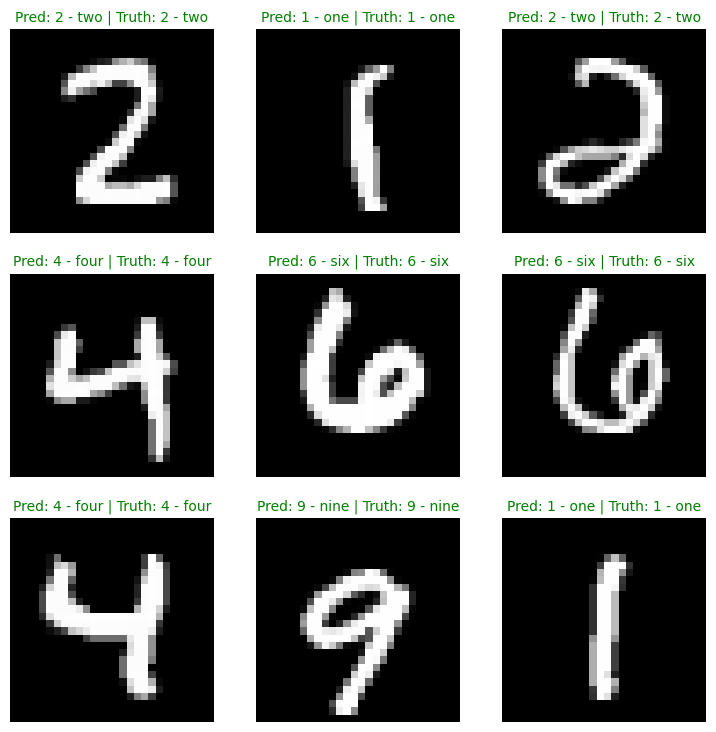

In [91]:
# Plot predictions
plt.figure (figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create plot
    plt.subplot(nrows, ncols,i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of the title next
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") #green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)
    

In [93]:
from tqdm.auto import tqdm

# Make predictions with the trained model
y_preds = []

model_1.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_1(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of probabilities into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)

# y_pred_tensor[:10]
y_pred_tensor

Making Predictions...: 100%|██████████| 313/313 [00:01<00:00, 168.37it/s]


tensor([7, 2, 1,  ..., 4, 5, 6])

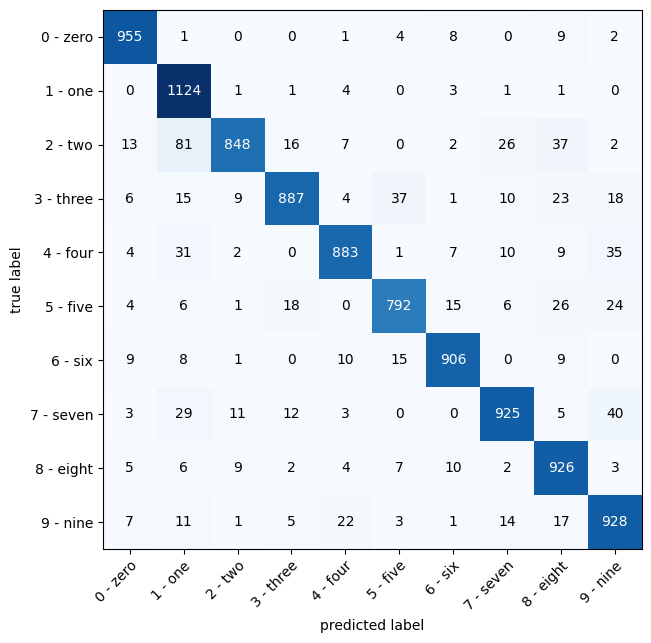

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',
                          num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib likes working with Numpy arrays
    class_names= class_names,
    figsize=(10, 7)
)

In [113]:
random_tensor = torch.randn(size=(1, 3, 64, 64))

conv2d_layer = nn.Conv2d(in_channels=3,
                        out_channels=30,
                        kernel_size=3,
                        padding=0,
                        stride=1
                        )

maxpool_layer = nn.MaxPool2d(kernel_size=2)

output = maxpool_layer(conv2d_layer(random_tensor.squeeze()))

output.shape

torch.Size([30, 31, 31])